In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import random
import os
from collections import defaultdict
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras import layers, optimizers, backend, models
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from IPython.display import display
import argparse
import tensorflow as tf

In [2]:
def show_samples(data_path, img_path):
	all_imgs = os.listdir(img_path)
	sample_img = random.sample(all_imgs, 9)
	sample_img_path   =  [  os.path.join(img_path, sample)  for sample in sample_img ]
	
	fig, axes = plt.subplots(3, 3 , figsize = (10, 10) )
	for ax, img in zip(axes.flatten(), sample_img_path):
		image = Image.open(img)
		ax.imshow(image)
		ax.axis('off')
	
	plt.tight_layout()
	plt.subplots_adjust(top = 0.9)
	plt.suptitle("Sample Images" , fontsize = 16)
	plt.show()


------------------------------------------------------------

In [3]:
patterns = [ "11_1TOP", "2_2FR45", "7_2FR45", "12_2FR45", "17_2FR45",
        "22_2FR45", "27_2FR45", "32_2FR45", "37_2FR45", "21_1TOP" ]

def select_imgs(img_path):
    selected_imgs_list = [img for img in img_path if any(pattern in img for pattern in patterns) ]
    return selected_imgs_list


data_path = '/kaggle/input/training-garlic'
data_path_2 = '/kaggle/input/validation-garlic'

img_path_s = os.path.join(data_path, 'garlic_uiseong_S')
img_path_m = os.path.join(data_path, 'garlic_uiseong_M')
img_path_l = os.path.join(data_path, 'garlic_uiseong_L')
img_path_2s = os.path.join(data_path_2, 'garlic_uiseong_S')
img_path_2m = os.path.join(data_path_2, 'garlic_uiseong_M')
img_path_2l = os.path.join(data_path_2, 'garlic_uiseong_L')

img_s =  os.listdir(img_path_s)
img_m =  os.listdir(img_path_m)
img_l =  os.listdir(img_path_l)
img_2s =  os.listdir(img_path_2s)
img_2m =  os.listdir(img_path_2m)
img_2l =  os.listdir(img_path_2l)

img_s_list = select_imgs(img_s)
img_m_list = select_imgs(img_m)
img_l_list = select_imgs(img_l)
img_2s_list = select_imgs(img_2s)
img_2m_list = select_imgs(img_2m)
img_2l_list = select_imgs(img_2l)

training_img_s =  [os.path.join(img_path_s, img) for img  in img_s_list]
training_img_m =  [os.path.join(img_path_m, img) for img  in img_m_list]
training_img_l =  [os.path.join(img_path_l, img) for img  in img_l_list]

test_img_s =  [os.path.join(img_path_2s, img) for img  in img_2s_list]
test_img_m =  [os.path.join(img_path_2m, img) for img  in img_2m_list]
test_img_l =  [os.path.join(img_path_2l, img) for img  in img_2l_list]


# persimmon_bansi_training : 1 ~ 58 (delete 59)
# persimmon_bansi_test : 77 ~ 84 (delete 76)


In [4]:
training_img_s[:1]

['/kaggle/input/training-garlic/garlic_uiseong_S/garlic_uiseong_S_68-2_2FR45.png']

In [5]:
training_persimmon_bansi_s = sorted(training_img_s, key = lambda x: ( \
                                    int(x.split("garlic_uiseong_S_")[1].split("-")[0]),
                                    #int(x.split("bansi_S_")[1].split("-")[1].split("_")[0])
                                   ) )

training_persimmon_bansi_m = sorted(training_img_m, key = lambda x: ( \
                                    int(x.split("garlic_uiseong_M_")[1].split("-")[0]),
                                    #int(x.split("bansi_M_")[1].split("-")[1].split("_")[0])
                                   ) )

training_persimmon_bansi_l = sorted(training_img_l, key = lambda x: ( \
                                    int(x.split("garlic_uiseong_L_")[1].split("-")[0]),
                                   # int(x.split("bansi_L_")[1].split("-")[1].split("_")[0])
                                   ) )


test_persimmon_bansi_s = sorted(test_img_s, key = lambda x: ( \
                                    int(x.split("garlic_uiseong_S_")[1].split("-")[0]),
                                   # int(x.split("bansi_S_")[1].split("-")[1].split("_")[0])
                                   ) )

test_persimmon_bansi_m = sorted(test_img_m, key = lambda x: ( \
                                    int(x.split("garlic_uiseong_M_")[1].split("-")[0]),
                                   # int(x.split("bansi_M_")[1].split("-")[1].split("_")[0])
                                   ) )

test_persimmon_bansi_l = sorted(test_img_l, key = lambda x: ( \
                                    int(x.split("garlic_uiseong_L_")[1].split("-")[0]),
                                   # int(x.split("bansi_L_")[1].split("-")[1].split("_")[0])
                                   ) )

In [6]:


images = []
labels = []
test_images = []
test_labels = []

def load_and_label(image_path, label):
    for image in image_path:
        img = load_img(image, target_size = (224, 224))
        img_array =img_to_array(img) / 225.0
        images.append(img_array)
        labels.append(label)


load_and_label(training_persimmon_bansi_s , 0)
load_and_label(training_persimmon_bansi_m, 1)
load_and_label(training_persimmon_bansi_l, 2)

def test_load_and_label(image_path, label):
    for image in image_path:
        img = load_img(image, target_size = (224, 224))
        img_array =img_to_array(img) / 225.0
        test_images.append(img_array)
        test_labels.append(label)

test_load_and_label(test_persimmon_bansi_s, 0)
test_load_and_label(test_persimmon_bansi_m, 1)
test_load_and_label(test_persimmon_bansi_l, 2)

images = np.array(images)
labels = np.array(labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [7]:
print(len(training_persimmon_bansi_s) ,len(training_persimmon_bansi_m), len(training_persimmon_bansi_l) )

1460 1011 962


In [10]:
length_s = len(training_persimmon_bansi_s)
length_m = len(training_persimmon_bansi_m)
length_l = len(training_persimmon_bansi_l)


split_s = int(length_s * 0.8)
split_m = int(length_m * 0.8)
split_l = int(length_l * 0.8)


X_train_s = images[:split_s]
y_train_s = labels[:split_s]
X_train_m = images[length_s:length_s + split_m]
y_train_m = labels[length_s:length_s + split_m]
X_train_l = images[length_s + length_m:length_s + length_m + split_l]
y_train_l = labels[length_s + length_m:length_s + length_m + split_l]


X_train = np.concatenate([X_train_s, X_train_m, X_train_l], axis=0)
y_train = np.concatenate([y_train_s, y_train_m, y_train_l], axis=0)


X_val_s = images[split_s:length_s]
y_val_s = labels[split_s:length_s]
X_val_m = images[length_s + split_m:length_s + length_m]
y_val_m = labels[length_s + split_m:length_s + length_m]
X_val_l = images[length_s + length_m + split_l:]
y_val_l = labels[length_s + length_m + split_l:]


X_val = np.concatenate([X_val_s, X_val_m, X_val_l], axis=0)
y_val = np.concatenate([y_val_s, y_val_m, y_val_l], axis=0)


In [11]:

print(X_train.shape[0])
print(X_val.shape[0])
print(images.shape)

2745
688
(3433, 224, 224, 3)


In [12]:
train_datagen = ImageDataGenerator(
)
val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size = 16)
val_generator = val_datagen.flow(X_val, y_val, batch_size = 16)
test_generator = test_datagen.flow(test_images, test_labels, batch_size = 16)

In [13]:
from tensorflow.keras.applications import ResNet50, Xception, MobileNetV2, \
EfficientNetB0, InceptionResNetV2
from tensorflow.keras import regularizers
import time



In [34]:

backend.clear_session()

model_base =  InceptionResNetV2(weights = 'imagenet', include_top = False)

InceptionV3_model = model_base.output
pool = GlobalAveragePooling2D()(InceptionV3_model)
dense_1 = layers.Dense(256, activation = 'relu')(pool)
output = layers.Dense(3, activation = 'softmax')(dense_1)


model_InceptionV3 = Model(inputs = model_base.input, outputs = output)

model_InceptionV3.compile(loss = 'sparse_categorical_crossentropy', 
                optimizer = optimizers.SGD(momentum = 0.9, learning_rate = 1e-4),
                metrics = ['accuracy']
                        )

219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [28]:
from tensorflow.keras.layers import Conv2D, Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential


backend.clear_session()
model  =  Sequential([
    Input(shape = (224, 224, 3)),
    Conv2D(64, (3,3), activation = 'relu'),
    Conv2D(128,(3,3), activation = 'relu'),
    Conv2D(256, (3,3), activation = 'relu'),
    GlobalAveragePooling2D(),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(3, activation = 'softmax')    
])



model.compile(loss = 'sparse_categorical_crossentropy', 
                optimizer = 'adam',
                metrics = ['accuracy']
                        )


In [35]:
start_time = time.time()
history = model_InceptionV3.fit(
    train_generator, 
    epochs = 25,
    validation_data = val_generator,
    verbose = 1,
    callbacks = [EarlyStopping(monitor = 'val_accuracy', patience= 5, restore_best_weights = True, min_delta = 0.01)]
)

end_time = time.time()

elapsed_time = end_time - start_time

print(f'{elapsed_time:.2f}')

loss, accuracy= model_InceptionV3.evaluate(test_generator)
print(loss, accuracy)

Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1732934525.489347     180 service.cc:145] XLA service 0x7ba680003000 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732934525.489416     180 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732934525.489421     180 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1732934578.886244     180 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


172/172 ━━━━━━━━━━━━━━━━━━━━ 209s 624ms/step - accuracy: 0.4146 - loss: 1.0724 - val_accuracy: 0.4419 - val_loss: 1.1033
Epoch 2/25
172/172 ━━━━━━━━━━━━━━━━━━━━ 53s 310ms/step - accuracy: 0.6068 - loss: 0.9201 - val_accuracy: 0.4448 - val_loss: 1.0588
Epoch 3/25
172/172 ━━━━━━━━━━━━━━━━━━━━ 54s 316ms/step - accuracy: 0.6998 - loss: 0.8203 - val_accuracy: 0.4520 - val_loss: 1.0384
Epoch 4/25
172/172 ━━━━━━━━━━━━━━━━━━━━ 54s 316ms/step - accuracy: 0.7186 - loss: 0.7384 - val_accuracy: 0.4637 - val_loss: 1.0159
Epoch 5/25
172/172 ━━━━━━━━━━━━━━━━━━━━ 54s 316ms/step - accuracy: 0.7681 - loss: 0.6394 - val_accuracy: 0.4738 - val_loss: 1.0026
Epoch 6/25
172/172 ━━━━━━━━━━━━━━━━━━━━ 54s 315ms/step - accuracy: 0.7991 - loss: 0.5835 - val_accuracy: 0.5058 - val_loss: 0.9650
Epoch 7/25
172/172 ━━━━━━━━━━━━━━━━━━━━ 54s 316ms/step - accuracy: 0.8154 - loss: 0.5230 - val_accuracy: 0.5276 - val_loss: 0.9302
Epoch 8/25
172/172 ━━━━━━━━━━━━━━━━━━━━ 54s 316ms/step - accuracy: 0.8397 - loss: 0.4514 - va

In [26]:
print(f'{elapsed_time:.2f}')

1347.57


In [33]:
model_InceptionV3 = load_model('/kaggle/input/garlic_inceptionresnetv2/keras/default/1/garlic_InceptionV3')

ValueError: File format not supported: filepath=/kaggle/input/garlic_inceptionresnetv2/keras/default/1/garlic_InceptionV3. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(/kaggle/input/garlic_inceptionresnetv2/keras/default/1/garlic_InceptionV3, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

In [36]:
loss, accuracy= model_InceptionV3.evaluate(test_generator)
print(loss, accuracy)

50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.7384 - loss: 0.6907
0.7242900133132935 0.7385786771774292


In [37]:
grouped_images = defaultdict(list)


test_img_paths = test_persimmon_bansi_s + test_persimmon_bansi_m + test_persimmon_bansi_l

for img_path in test_img_paths:
	fruit_id = img_path.split("garlic_uiseong_")[2].split('-')[0]
	grouped_images[fruit_id].append(img_path)


In [48]:
predicted_label = defaultdict(list)

def predict_group(model, image_paths, fruit_id):
    preds = []
    
    for img_path in image_paths:
        img = load_img(img_path, target_size = (224, 224))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis = 0)
        
        pred = model.predict(img_array, verbose = 0)
        preds.append(np.argmax(pred))
        predicted_label[fruit_id].append(np.argmax(pred))
    
    final_class = max(set(preds), key=preds.count)
    
    return final_class


correct_cnt = 0
total_cnt = 0 


for fruit_id, img_paths in grouped_images.items():
    final_class = predict_group(model_InceptionV3, img_paths, fruit_id)
    
    if 'S' in fruit_id:
        true_class = 0
    elif 'M' in fruit_id:
        true_class = 1
    elif 'L' in fruit_id:
        true_class = 2
    else:
        print('error!')
    
    if true_class == final_class:
        correct_cnt += 1
        total_cnt += 1
    else: 
        total_cnt +=1

    

accuracy_score= correct_cnt/total_cnt

print(accuracy_score)

0.7


In [49]:
predicted_label

defaultdict(list,
            {'S_199': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             'S_200': [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
             'S_201': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             'S_202': [0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
             'S_203': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             'S_204': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
             'S_205': [1, 2, 2, 0, 2, 1, 0, 1, 0, 0],
             'S_206': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             'S_207': [0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
             'S_208': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             'S_209': [2, 1, 2, 0, 2, 1, 1, 1, 1, 2],
             'S_210': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             'S_211': [0, 0, 0, 0, 2, 1, 0, 2, 0, 0],
             'S_212': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             'S_213': [0, 0, 0, 1, 0, 2, 2, 1, 0, 2],
             'S_214': [0, 0, 0, 2, 2, 0, 2, 0, 0, 2],
             'S_215': [0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
             'S_216': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
          

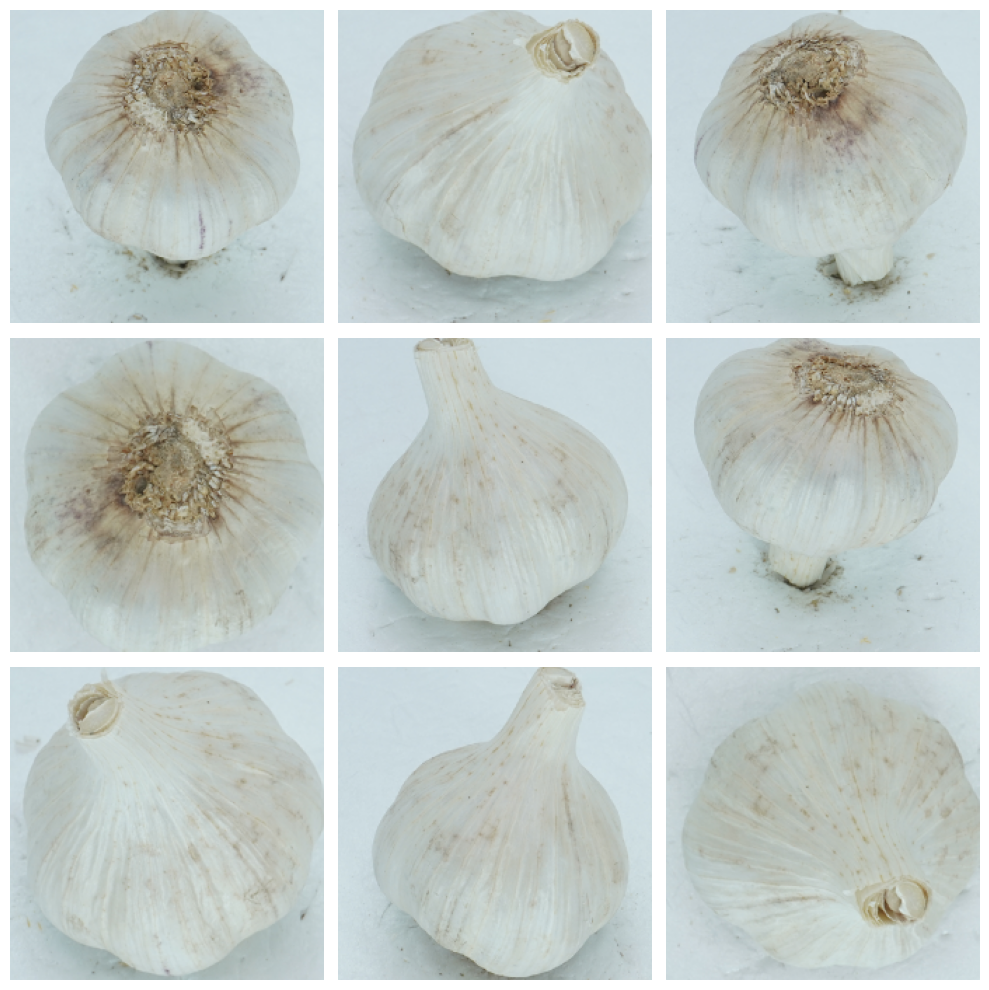

In [80]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img

fig, axes = plt.subplots(3,3, figsize = (10, 10))
axes = axes.flatten()

target_img_paths = grouped_images['M_160'][:9]


for i, img_path in enumerate(target_img_paths):

    img = load_img(img_path, target_size = (224, 224))
    axes[i].imshow(img)
    axes[i].axis('off')


plt.tight_layout()
plt.show()

----------------------------------------------------------------------------------------------

In [42]:
for fruit_id, img_paths in grouped_images.items():
    print(f"Fruit ID: {fruit_id}, Number of images: {len(img_paths)}")

Fruit ID: S_199, Number of images: 10
Fruit ID: S_200, Number of images: 10
Fruit ID: S_201, Number of images: 10
Fruit ID: S_202, Number of images: 10
Fruit ID: S_203, Number of images: 10
Fruit ID: S_204, Number of images: 10
Fruit ID: S_205, Number of images: 10
Fruit ID: S_206, Number of images: 10
Fruit ID: S_207, Number of images: 10
Fruit ID: S_208, Number of images: 10
Fruit ID: S_209, Number of images: 10
Fruit ID: S_210, Number of images: 10
Fruit ID: S_211, Number of images: 10
Fruit ID: S_212, Number of images: 10
Fruit ID: S_213, Number of images: 10
Fruit ID: S_214, Number of images: 10
Fruit ID: S_215, Number of images: 10
Fruit ID: S_216, Number of images: 10
Fruit ID: S_217, Number of images: 10
Fruit ID: S_218, Number of images: 10
Fruit ID: S_219, Number of images: 10
Fruit ID: S_220, Number of images: 10
Fruit ID: S_221, Number of images: 10
Fruit ID: S_222, Number of images: 10
Fruit ID: S_223, Number of images: 10
Fruit ID: S_224, Number of images: 10
Fruit ID: M_

In [43]:
grouped_images['S_199']

['/kaggle/input/validation-garlic/garlic_uiseong_S/garlic_uiseong_S_199-11_1TOP.png',
 '/kaggle/input/validation-garlic/garlic_uiseong_S/garlic_uiseong_S_199-7_2FR45.png',
 '/kaggle/input/validation-garlic/garlic_uiseong_S/garlic_uiseong_S_199-12_2FR45.png',
 '/kaggle/input/validation-garlic/garlic_uiseong_S/garlic_uiseong_S_199-27_2FR45.png',
 '/kaggle/input/validation-garlic/garlic_uiseong_S/garlic_uiseong_S_199-17_2FR45.png',
 '/kaggle/input/validation-garlic/garlic_uiseong_S/garlic_uiseong_S_199-32_2FR45.png',
 '/kaggle/input/validation-garlic/garlic_uiseong_S/garlic_uiseong_S_199-21_1TOP.png',
 '/kaggle/input/validation-garlic/garlic_uiseong_S/garlic_uiseong_S_199-37_2FR45.png',
 '/kaggle/input/validation-garlic/garlic_uiseong_S/garlic_uiseong_S_199-2_2FR45.png',
 '/kaggle/input/validation-garlic/garlic_uiseong_S/garlic_uiseong_S_199-22_2FR45.png']

In [88]:
train_images_dict = defaultdict(list)

training = training_persimmon_bansi_s + training_persimmon_bansi_m + training_persimmon_bansi_l
for path in training:
    group_name =  path.split("garlic_uiseong_")[2].split('-')[0]
    train_images_dict[group_name].append(path)

In [53]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Concatenate
from tensorflow.keras.models import Model
import cv2

In [97]:
for group_name, img_paths in train_images_dict.items():
    if len(img_paths) != 10:
        print(group_name, len(img_paths))

remove = ['M_102', 'L_97']

for key in remove:
    if key in train_images_dict:
        del train_images_dict[key]

In [98]:
def load_multi_view_images(image_paths, target_size=(112, 112)):
    views = []
    for img_path in image_paths:
        img = cv2.imread(img_path)
        img = cv2.resize(img, target_size)
        img_array = img / 255.0
        views.append(img_array)
    return np.array(views, dtype=np.float32)

all_views = []
labels = []

for group_name, img_paths in train_images_dict.items():
    if 'S' in group_name:
        label = 0
    elif 'M' in group_name:
        label = 1
    elif 'L' in group_name:
        label = 2
    else:
        print('error!')

    views = load_multi_view_images(img_paths)
    all_views.append(views)
    labels.append(label)

all_views = np.array(all_views, dtype=np.float32)
labels = np.array(labels)


X_train, X_val, y_train, y_val = train_test_split(all_views, labels, test_size=0.2, random_state=42)

In [99]:
def build_mvcnn_model(input_shape, num_views, num_classes):
    inputs = [Input(shape=input_shape) for _ in range(num_views)]

    shared_cnn = tf.keras.Sequential([
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten()
    ])

    view_features = [shared_cnn(inp) for inp in inputs]
    

    merged = Concatenate()(view_features)
    x = Dense(256, activation='relu')(merged)
    x = Dense(128, activation='relu')(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=output)
    return model


input_shape = (112, 112, 3)
num_views = X_train.shape[1] 
num_classes = 3

mvcnn_model = build_mvcnn_model(input_shape, num_views, num_classes)
mvcnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


train_inputs = [X_train[:, i] for i in range(num_views)]
val_inputs = [X_val[:, i] for i in range(num_views)]

early_stopping = EarlyStopping(
    monitor = 'val_accuracy',
    min_delta = 0.05,
    patience = 5,
    restore_best_weights = True
)

history = mvcnn_model.fit(train_inputs, y_train, validation_data=(val_inputs, y_val),\
                          epochs=20, batch_size=8, verbose=1, callbacks = [early_stopping])

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 283ms/step - accuracy: 0.3547 - loss: 43.3026 - val_accuracy: 0.4928 - val_loss: 1.0795
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.4892 - loss: 1.1427 - val_accuracy: 0.4348 - val_loss: 1.9077
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.7819 - loss: 0.5280 - val_accuracy: 0.3623 - val_loss: 1.7649
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.9820 - loss: 0.0983 - val_accuracy: 0.6667 - val_loss: 0.7122
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 0.7391 - val_loss: 0.8450
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 1.0000 - loss: 6.3087e-04 - val_accuracy: 0.7101 - val_loss: 0.7788
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 1.0000 - loss: 3.3503e-04 - val_accuracy: 0.7391 - val_loss: 0.7520
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 1.0000 - loss: 1.4802e-04 - val_acc

In [108]:
test_images_dict = grouped_images 

remove_list = ['M_154', 'L_150', 'S_127']

for key in remove_list:
    if key in test_images_dict:
        del test_images_dict[key]

In [109]:

test_all_views = []
test_labels = []

for group_name, img_paths in test_images_dict.items():
    if 'S' in group_name:
        label = 0
    elif 'M' in group_name:
        label = 1
    elif 'L' in group_name:
        label = 2
    else:
        continue

    views = load_multi_view_images(img_paths)
    test_all_views.append(views)
    test_labels.append(label)

test_all_views = np.array(test_all_views, dtype=np.float32)
test_labels = np.array(test_labels)

num_views = test_all_views.shape[1]  
test_inputs = [test_all_views[:, i] for i in range(num_views)]


loss, accuracy = mvcnn_model.evaluate(test_inputs, test_labels, verbose = 1)
print(loss, accuracy )

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.5912 - loss: 1.1302
1.5183771848678589 0.4871794879436493


In [115]:
garlic_s = '/kaggle/input/garlic-metadata/garlic_uiseong_S'
garlic_m = '/kaggle/input/garlic-metadata/garlic_uiseong_M'
garlic_l = '/kaggle/input/garlic-metadata/garlic_uiseong_L'

list_s = []
list_m = []
list_l = []

for path in os.listdir(garlic_s):
    if '1TOP' in path:
        list_s.append(os.path.join(garlic_s, path))


for path in os.listdir(garlic_m):
    if '1TOP' in path:
        list_m.append(os.path.join(garlic_m, path))


for path in os.listdir(garlic_l):
    if '1TOP' in path:
        list_l.append(os.path.join(garlic_l, path))
        

In [116]:
list_s[:10]

['/kaggle/input/garlic-metadata/garlic_uiseong_S/garlic_uiseong_S_219-36_1TOP.json',
 '/kaggle/input/garlic-metadata/garlic_uiseong_S/garlic_uiseong_S_202-36_1TOP.json',
 '/kaggle/input/garlic-metadata/garlic_uiseong_S/garlic_uiseong_S_215-1_1TOP.json',
 '/kaggle/input/garlic-metadata/garlic_uiseong_S/garlic_uiseong_S_210-31_1TOP.json',
 '/kaggle/input/garlic-metadata/garlic_uiseong_S/garlic_uiseong_S_215-6_1TOP.json',
 '/kaggle/input/garlic-metadata/garlic_uiseong_S/garlic_uiseong_S_208-26_1TOP.json',
 '/kaggle/input/garlic-metadata/garlic_uiseong_S/garlic_uiseong_S_216-16_1TOP.json',
 '/kaggle/input/garlic-metadata/garlic_uiseong_S/garlic_uiseong_S_200-31_1TOP.json',
 '/kaggle/input/garlic-metadata/garlic_uiseong_S/garlic_uiseong_S_215-21_1TOP.json',
 '/kaggle/input/garlic-metadata/garlic_uiseong_S/garlic_uiseong_S_220-1_1TOP.json']

In [124]:
import json

weight_list_s = []
weight_list_m = []
weight_list_l = []


for element in list_s:
    
    with open(element, 'r') as file:
        data = json.load(file)
        weight = data.get('weight', None)
        weight_list_s.append(weight)


for element in list_m:
    
    with open(element, 'r') as file:
        data = json.load(file)
        weight = data.get('weight', None)
        weight_list_m.append(weight)



for element in list_l:
    
    with open(element, 'r') as file:
        data = json.load(file)
        weight = data.get('weight', None)
        weight_list_l.append(weight)




In [125]:
weight_list_s = [int(x) for x in weight_list_s]

avg_s = sum(weight_list_s) / len(weight_list_s)


weight_list_m = [int(x) for x in weight_list_m]

avg_m = sum(weight_list_m) / len(weight_list_m)


weight_list_l = [int(x) for x in weight_list_l]

avg_l = sum(weight_list_l) / len(weight_list_l)

print(avg_s, avg_m, avg_l)

19.307692307692307 33.666666666666664 43.679245283018865


In [126]:
def get_avg_weight(path_s, path_m, path_l):
        
    list_s = []
    list_m = []
    list_l = []
        
    for path in os.listdir(path_s):
        if '1TOP' in path:
            list_s.append(os.path.join(path_s, path))
    
    
    for path in os.listdir(path_m):
        if '1TOP' in path:
            list_m.append(os.path.join(path_m, path))
    
    
    for path in os.listdir(path_l):
        if '1TOP' in path:
            list_l.append(os.path.join(path_l, path))
                    
    
    
    weight_list_s = []
    weight_list_m = []
    weight_list_l = []
    
    
    for element in list_s:
        
        with open(element, 'r') as file:
            data = json.load(file)
            weight = data.get('weight', None)
            weight_list_s.append(weight)
    
    
    for element in list_m:
        
        with open(element, 'r') as file:
            data = json.load(file)
            weight = data.get('weight', None)
            weight_list_m.append(weight)
    
    
    
    for element in list_l:
        
        with open(element, 'r') as file:
            data = json.load(file)
            weight = data.get('weight', None)
            weight_list_l.append(weight)
    
        
    weight_list_s = [int(x) for x in weight_list_s]
    
    avg_s = sum(weight_list_s) / len(weight_list_s)
    
    
    weight_list_m = [int(x) for x in weight_list_m]
    
    avg_m = sum(weight_list_m) / len(weight_list_m)
    
    
    weight_list_l = [int(x) for x in weight_list_l]
    
    avg_l = sum(weight_list_l) / len(weight_list_l)
    
   

    return avg_s, avg_m, avg_l

path_s = '/kaggle/input/chinese-cabbage-metadata/Chinese-cabbage_S'
path_m = '/kaggle/input/chinese-cabbage-metadata/Chinese-cabbage_M'
path_l = '/kaggle/input/chinese-cabbage-metadata/Chinese-cabbage_L'


avg_s, avg_m, avg_l = get_avg_weight(path_s, path_m, path_l)
print(avg_s, avg_m, avg_l)


1805.4313725490197 2254.5320197044334 3014.0196078431372


In [127]:
path_s = '/kaggle/input/persimmon-bansi-metadata/persimmon_bansi_S'
path_m = '/kaggle/input/persimmon-bansi-metadata/persimmon_bansi_M'
path_l = '/kaggle/input/persimmon-bansi-metadata/persimmon_bansi_L'


avg_s, avg_m, avg_l = get_avg_weight(path_s, path_m, path_l)
print(avg_s, avg_m, avg_l)


140.59701492537314 135.37313432835822 171.86567164179104
